In [8]:
import pandas as pd
from collections import defaultdict
from tqdm import tqdm

In [3]:
artists = pd.read_csv('../data/artists.csv')

In [21]:
artists.sort_values(by=['popularity'], inplace=False, ascending=False)

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
115489,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
144484,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96
...,...,...,...,...,...
711996,3ThJA9PWjjpwBPFBG14npB,6.0,[],Patty's Mood,0
711994,3emnkWFgHrUosvSsCoU74A,2.0,[],G.M. Dream,0
711993,6M2v0nma4jYPed1fw4FdB2,11.0,[],Francisco Quisquinay,0
711992,4JElfADneckBmezGid5Wjn,43.0,['marimba de guatemala'],Marimba Reina Chicaj,0


In [9]:
genres_popularity = defaultdict(int)
for x in tqdm(artists.to_dict('records')):
    for genre in eval(x['genres']):
        genres_popularity[genre] += x['popularity']

100%|██████████| 1162095/1162095 [00:05<00:00, 226142.31it/s]


<Axes: ylabel='genre'>

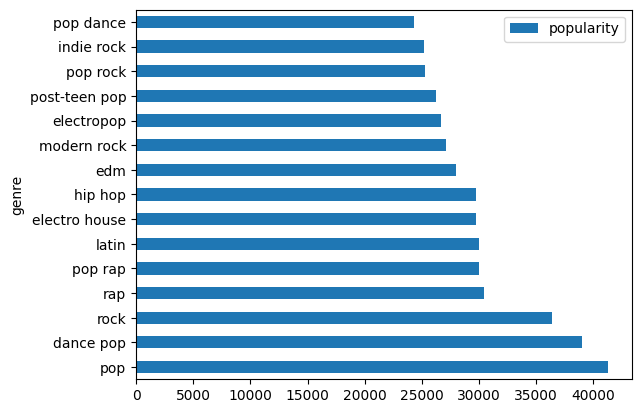

In [15]:
df = pd.DataFrame({'genre': genres_popularity.keys(), 'popularity': genres_popularity.values()})
df = df.sort_values(by=['popularity'], ascending=False, inplace=False)
df = df.head(15)
df.plot.barh(x='genre', y='popularity')

<Axes: xlabel='popularity', ylabel='followers'>

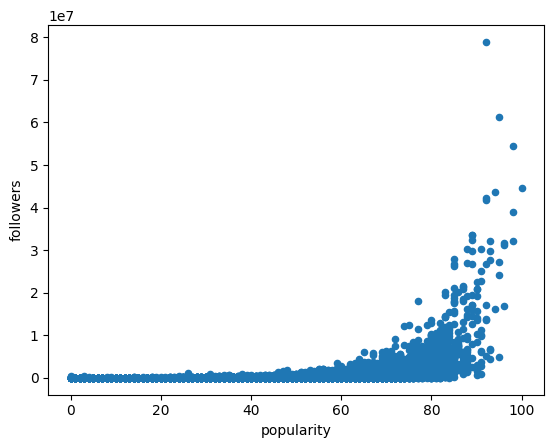

In [24]:
df = artists.sort_values(by=['popularity'], inplace=False, ascending=True)
df.plot.scatter(x='popularity', y='followers')

In [3]:
tracks = pd.read_csv('../data/tracks.csv')

In [5]:
def convert_date(d: str):
    if d.count('-') == 0:
        return d + '-01-01'
    if d.count('-') == 1:
        return d + '-01'
    return d


tracks['release_date'] = tracks['release_date'].apply(convert_date)
tracks['release_year'] = tracks['release_date'].apply(lambda x: int(x.split('-')[0]))

In [40]:
tracks['popularity'].corr(tracks['instrumentalness'])

-0.23648731455239624

In [39]:
tracks['tempo'].corr(tracks['speechiness'])

-0.0869105598531733

In [18]:
tracks.sort_values(by=['popularity'], inplace=False, ascending=False) # [['name', 'popularity', 'artists', 'release_year']]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.6960,...,-6.181,1,0.1190,0.3210,0.000000,0.420,0.464,90.030,4,2021
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.4360,...,-8.761,1,0.0601,0.7210,0.000013,0.105,0.132,143.874,4,2021
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.6950,...,-6.865,0,0.0913,0.1750,0.000000,0.150,0.472,149.996,4,2021
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.8260,...,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,4,2020
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.5240,...,-9.016,0,0.0502,0.1120,0.000000,0.203,0.553,83.970,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23410,0sniGbmm1sjg51BxO6AHD4,O Pardesi Musafir,0,198053,0,"['Suraiya', 'Lata Mangeshkar']","['71lk7UDkZK1mabUE6LCASW', '61JrslREXq98hurYL2...",1949-01-01,0.682,0.3050,...,-8.558,1,0.0578,0.9240,0.000000,0.119,0.910,152.850,3,1949
23409,0sk8KA96i9MIU8St2nmbIx,Mere Dil Mein Aao Aur Bas Jao,0,171133,0,['Suraiya'],['71lk7UDkZK1mabUE6LCASW'],1949-01-01,0.527,0.2030,...,-14.199,1,0.0667,0.9900,0.000012,0.129,0.688,170.733,4,1949
23408,0sdkzsc3WtZIrSi1nNyl7v,"Diversions, Op. 21: Variation 9, Toccata I",0,46720,0,"['Benjamin Britten', 'Leon Fleisher', 'Seiji O...","['7MJ1pB5d6Vjmzep2zQlorn', '6ncNdxBc8zVWMOF7nJ...",1949-01-01,0.441,0.2420,...,-28.776,1,0.0323,0.9290,0.955000,0.116,0.528,132.060,4,1949
23407,0s6h3lMdJsWkpUAW6xC7m3,John Henry,0,189973,0,['Lead Belly'],['3Ovf2lytXSXWFM2cwsJACC'],1949-01-01,0.593,0.7480,...,-6.514,0,0.4060,0.8880,0.021800,0.680,0.732,123.634,4,1949


In [28]:
df = tracks[tracks['popularity'] > 50]
len(df[df['danceability'] >= 0.5]) / len(df)

0.7750959010387484

In [32]:
tracks['release_year'].min(), tracks['release_year'].max()

(1900, 2021)

In [33]:
len(tracks[tracks['release_year'] >= 1980]) / len(tracks)

0.6877795429132463

<Axes: xlabel='release_year', ylabel='popularity'>

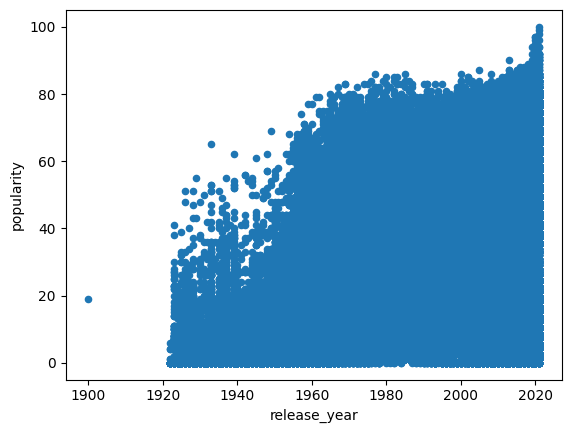

In [35]:
df = tracks.sort_values(by=['popularity'], inplace=False, ascending=True)
df.plot.scatter(x='release_year', y='popularity')

<Axes: xlabel='release_year'>

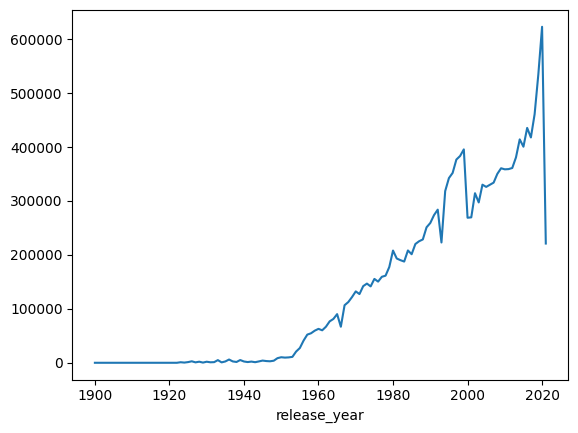

In [16]:
tracks.groupby('release_year').popularity.agg('sum').plot()

In [46]:
def pure_text(d):
    return ''.join([c for c in d if c.isalnum() or c == ' '])

tracks['artists'] = tracks['artists'].apply(lambda artists: str([pure_text(artist)
                                                                 for artist in eval(artists)]))

In [44]:
tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [47]:
tracks.to_csv("../data/tracks.csv", index=False)

In [41]:
eval(tracks['artists'][0])

['Uli']